In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare

In [94]:
# Read the conviction dataset
conviction_df = pd.read_csv("allstates_monthly_2020_2021.csv")
conviction_df


,state,type,GEOID,month,filings,filings_avg,last_updated
0,connecticut,Census Tract,09001010101,01/2020,0,0.000000,2023-01-07
1,connecticut,Census Tract,09001010101,02/2020,0,0.666667,2023-01-07
2,connecticut,Census Tract,09001010101,03/2020,0,0.666667,2023-01-07
3,connecticut,Census Tract,09001010101,04/2020,0,0.000000,2023-01-07
4,connecticut,Census Tract,09001010101,05/2020,0,0.000000,2023-01-07
...,...,...,...,...,...,...,...
456390,wisconsin,Census Tract,sealed,09/2022,63,3.666667,2023-01-07
456391,wisconsin,Census Tract,sealed,10/2022,41,2.000000,2023-01-07
456392,wisconsin,Census Tract,sealed,11/2022,50,1.666667,2023-01-07
456393,wisconsin,Census Tract,sealed,12/2022,31,5.666667,2023-01-07


In [95]:
conviction_df['month'] #test to see if I can extract column month

0         01/2020
1         02/2020
2         03/2020
3         04/2020
4         05/2020
           ...   
456390    09/2022
456391    10/2022
456392    11/2022
456393    12/2022
456394    01/2023
Name: month, Length: 456395, dtype: object

In [96]:
# Read the temperature of Connecticut dataset
CT_df = pd.read_csv("CT_temp.csv")
CT_df #print out CT temperature dataset

,Date,MeanAvgTemperature,HighestMaxTemperature,LowestMinTemperature
0,2020-01,34.6,70,7
1,2020-02,35.6,62,10
2,2020-03,44.1,73,20
3,2020-04,47.1,67,27
4,2020-05,59.5,82,34
5,2020-06,72.4,92,43
6,2020-07,79.3,98,62
7,2020-08,76.1,95,52
8,2020-09,66.8,87,36
9,2020-10,55.5,78,24


In [97]:
#perform the same task for Minnesota's dataset
MN_df = pd.read_csv("MN_temp.csv")
MN_df.head(10)


,Date,MeanAvgTemperature,HighestMaxTemperature,LowestMinTemperature
0,2020-01,20.4,37,-8
1,2020-02,20.2,43,-10
2,2020-03,35.8,58,17
3,2020-04,43.4,72,21
4,2020-05,58.2,80,35
5,2020-06,71.5,95,50
6,2020-07,75.7,93,58
7,2020-08,72.4,91,55
8,2020-09,60.2,83,39
9,2020-10,42.9,78,17


In [98]:
#read all csv files of Temperature of aach states
MN_df = pd.read_csv("MN_temp.csv")
CT_df = pd.read_csv("CT_temp.csv")
IN_df = pd.read_csv("IN_temp.csv")
VA_df = pd.read_csv("VA_temp.csv")
DE_df = pd.read_csv("DE_temp.csv")
PA_df = pd.read_csv("PA_temp.csv")
MO_df = pd.read_csv("MO_temp.csv")
NM_df = pd.read_csv("NM_temp.csv")
WI_df = pd.read_csv("WI_temp.csv")

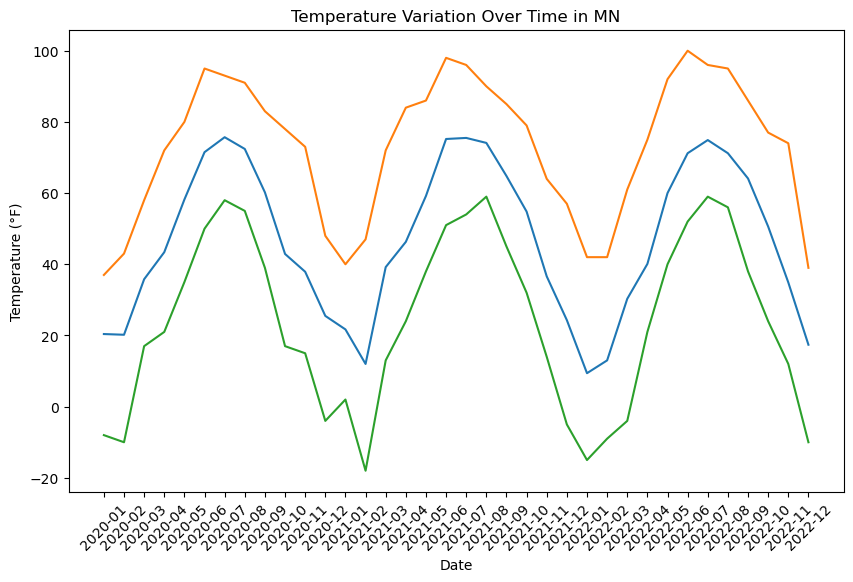

In [99]:
#try to make linegraph for Minnesota's temperature over 36 months

plt.figure(figsize=(10, 6))
plt.plot(MN_df['Date'], MN_df['MeanAvgTemperature'], label='Mean Avg Temperature')
plt.plot(MN_df['Date'], MN_df['HighestMaxTemperature'], label='Highest Max Temperature')
plt.plot(MN_df['Date'], MN_df['LowestMinTemperature'], label='Lowest Min Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Variation Over Time in MN')
plt.xticks(rotation=45)
plt.show()


In [100]:
'''Merge the DataFrames by the 'Date' column as data are all collected in the same scope of time.
   Then, we have to rename columns to differentiate mean temperature of each states.'''
merged_df = pd.merge(MN_df[['Date', 'MeanAvgTemperature']], CT_df[['Date', 'MeanAvgTemperature']], on='Date', suffixes=('_MN', '_CT'))
merged_df = pd.merge(merged_df, IN_df[['Date', 'MeanAvgTemperature']], on='Date', suffixes=('_MN', '_IN'))
merged_df = pd.merge(merged_df, VA_df[['Date', 'MeanAvgTemperature']], on='Date', suffixes=('_IN', '_VA'))
merged_df = pd.merge(merged_df, DE_df[['Date', 'MeanAvgTemperature']], on='Date', suffixes=('_VA', '_DE'))
merged_df = pd.merge(merged_df, PA_df[['Date', 'MeanAvgTemperature']], on='Date')
merged_df = pd.merge(merged_df, MO_df[['Date', 'MeanAvgTemperature']], on='Date')
merged_df = pd.merge(merged_df, NM_df[['Date', 'MeanAvgTemperature']], on='Date')
merged_df = pd.merge(merged_df, WI_df[['Date', 'MeanAvgTemperature']], on='Date')


merged_df.columns = ['Date', 'MeanAvgTemperature_MN', 'MeanAvgTemperature_CT', 'MeanAvgTemperature_IN',
                     'MeanAvgTemperature_VA', 'MeanAvgTemperature_DE', 'MeanAvgTemperature_PA',
                     'MeanAvgTemperature_MO', 'MeanAvgTemperature_NM', 'MeanAvgTemperature_WI']
merged_df.head(10)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15692\426658763.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'MeanAvgTemperature_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, NM_df[['Date', 'MeanAvgTemperature']], on='Date')


,Date,MeanAvgTemperature_MN,MeanAvgTemperature_CT,MeanAvgTemperature_IN,MeanAvgTemperature_VA,MeanAvgTemperature_DE,MeanAvgTemperature_PA,MeanAvgTemperature_MO,MeanAvgTemperature_NM,MeanAvgTemperature_WI
0,2020-01,20.4,34.6,35.0,43.2,37.8,34.8,35.6,30.7,25.9
1,2020-02,20.2,35.6,33.3,45.0,39.5,36.4,38.2,33.7,24.7
2,2020-03,35.8,44.1,46.2,54.8,47.3,44.4,50.4,43.4,38.3
3,2020-04,43.4,47.1,50.8,56.9,49.4,47.8,54.9,49.8,45.6
4,2020-05,58.2,59.5,60.7,63.8,58.5,58.9,64.0,60.0,57.0
5,2020-06,71.5,72.4,73.7,75.3,72.3,69.4,77.1,67.4,68.8
6,2020-07,75.7,79.3,78.4,82.9,79.1,79.1,81.1,72.0,75.5
7,2020-08,72.4,76.1,74.1,79.2,76.1,75.3,75.8,72.0,72.0
8,2020-09,60.2,66.8,67.8,69.7,66.9,64.6,69.0,61.4,61.3
9,2020-10,42.9,55.5,54.7,62.3,58.4,53.7,54.6,52.3,47.3


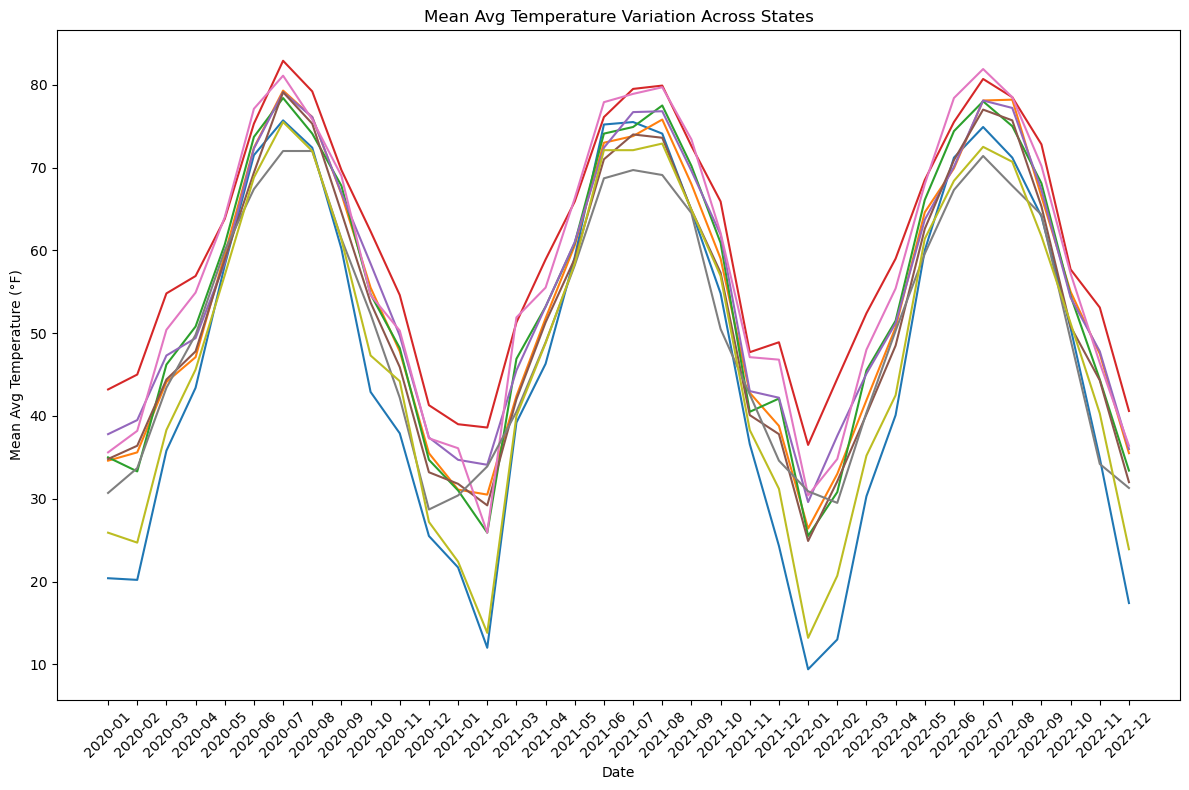

In [101]:
'''This cell aims to create a line graph for every states.
Each states will be represented by a line, shows the variation of temperature over 36 months.
We displays all lines on the same graph to see the similarities and differenecs among the states.'''
plt.figure(figsize=(12, 8))
for column in merged_df.columns[1:]:  
    plt.plot(merged_df['Date'], merged_df[column], label=column)
plt.xlabel('Date')
plt.ylabel('Mean Avg Temperature (°F)')
plt.title('Mean Avg Temperature Variation Across States')
plt.xticks(rotation=45) # Rotating labels for better visualization 
plt.tight_layout()
plt.show()

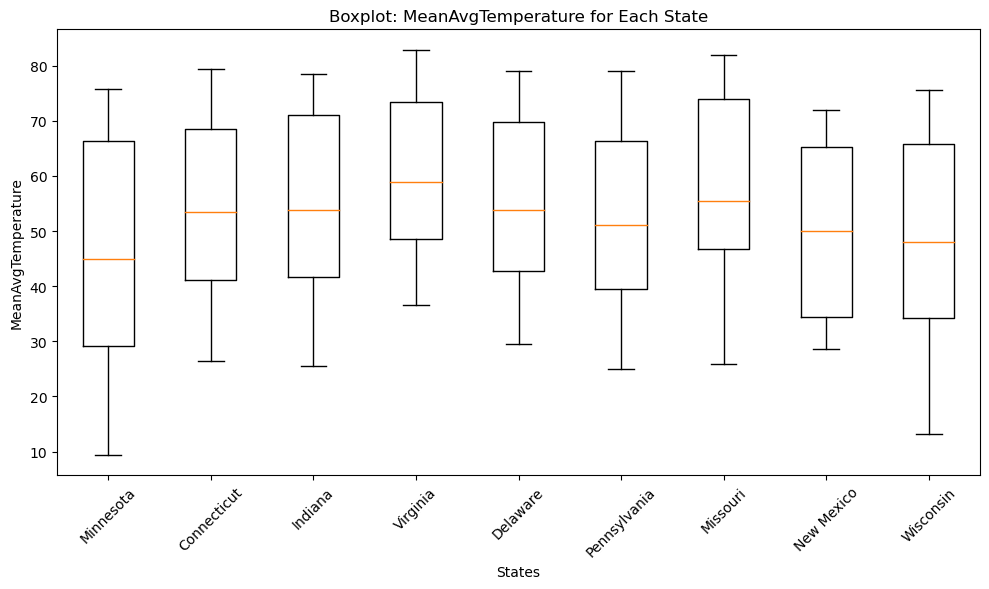

In [102]:
'''Combine List of dataframes of each state's temperature. Then create the boxplot based on that list,
so that all boxplot are on the same graph
'''

dfs = [MN_df, CT_df, IN_df, VA_df, DE_df, PA_df, MO_df, NM_df, WI_df]
states = ['Minnesota', 'Connecticut', 'Indiana', 'Virginia', 'Delaware', 'Pennsylvania', 'Missouri', 'New Mexico', 'Wisconsin']
temperature_data = [df['MeanAvgTemperature'] for df in dfs]
plt.figure(figsize=(10, 6))
plt.boxplot(temperature_data, labels=states)
plt.xlabel('States')
plt.ylabel('MeanAvgTemperature')
plt.title('Boxplot: MeanAvgTemperature for Each State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
#transform the dataset to get filings count by state by month instead of by GEOID by month
new_df = conviction_df.groupby(['state', 'month'], as_index=False)['filings'].sum()
new_df

,state,month,filings
0,connecticut,01/2020,1641
1,connecticut,01/2021,550
2,connecticut,01/2022,1243
3,connecticut,01/2023,280
4,connecticut,02/2020,1450
...,...,...,...
328,wisconsin,11/2021,1691
329,wisconsin,11/2022,2089
330,wisconsin,12/2020,1504
331,wisconsin,12/2021,1804


In [104]:
'''Convert 'Date' column to datetime format with the current format '01/2020' 
to 'year-month' in order to align with Date format in Temperature datasets.
'''

new_df['month'] = pd.to_datetime(new_df['month'], format='%m/%Y')
new_df['month'] = new_df['month'].dt.strftime('%Y-%m') #convert back to string with updated format
new_df

,state,month,filings
0,connecticut,2020-01,1641
1,connecticut,2021-01,550
2,connecticut,2022-01,1243
3,connecticut,2023-01,280
4,connecticut,2020-02,1450
...,...,...,...
328,wisconsin,2021-11,1691
329,wisconsin,2022-11,2089
330,wisconsin,2020-12,1504
331,wisconsin,2021-12,1804


In [105]:
#delete row with month January 2023, so that the combined dataset wont have missing values
filtered_df = new_df[new_df['month'] != '2023-01']
filtered_df

,state,month,filings
0,connecticut,2020-01,1641
1,connecticut,2021-01,550
2,connecticut,2022-01,1243
4,connecticut,2020-02,1450
5,connecticut,2021-02,595
...,...,...,...
328,wisconsin,2021-11,1691
329,wisconsin,2022-11,2089
330,wisconsin,2020-12,1504
331,wisconsin,2021-12,1804


In [106]:
"""
This cell create separate dataframe for each unique states. 
"""
unique_states = filtered_df['state'].unique()
for state in unique_states:
    globals()[f"{state}_df"] = filtered_df[filtered_df['state'] == state].copy()
    globals()[f"{state}_df"] = globals()[f"{state}_df"].reset_index(drop=True)

#show 3 of the states
print(connecticut_df)
print(wisconsin_df)
print(missouri_df)


          state    month  filings
0   connecticut  2020-01     1641
1   connecticut  2021-01      550
2   connecticut  2022-01     1243
3   connecticut  2020-02     1450
4   connecticut  2021-02      595
5   connecticut  2022-02     1174
6   connecticut  2020-03     1238
7   connecticut  2021-03      879
8   connecticut  2022-03     2490
9   connecticut  2020-04      167
10  connecticut  2021-04      724
11  connecticut  2022-04     2139
12  connecticut  2020-05       23
13  connecticut  2021-05      610
14  connecticut  2022-05     1995
15  connecticut  2020-06       29
16  connecticut  2021-06      694
17  connecticut  2022-06     2056
18  connecticut  2020-07      154
19  connecticut  2021-07      391
20  connecticut  2022-07     1976
21  connecticut  2020-08      135
22  connecticut  2021-08      556
23  connecticut  2022-08     2087
24  connecticut  2020-09      192
25  connecticut  2021-09     1041
26  connecticut  2022-09     1959
27  connecticut  2020-10      302
28  connecticu

In [107]:
''' Sample merge the DataFrames based on 'month' and 'date' columns, assuming they represent the same information.
    This only perform the merge for state Connecticut. Other states will be performed later, after this cells successfully run.
''' 
new_CT_df = pd.merge(connecticut_df, CT_df, left_on='month', right_on='Date', suffixes=('', '_CT'))
new_CT_df = new_CT_df.drop('month', axis=1)
new_CT_df.head(5)

,state,filings,Date,MeanAvgTemperature,HighestMaxTemperature,LowestMinTemperature
0,connecticut,1641,2020-01,34.6,70,7
1,connecticut,550,2021-01,31.1,50,8
2,connecticut,1243,2022-01,26.4,54,2
3,connecticut,1450,2020-02,35.6,62,10
4,connecticut,595,2021-02,30.5,51,11


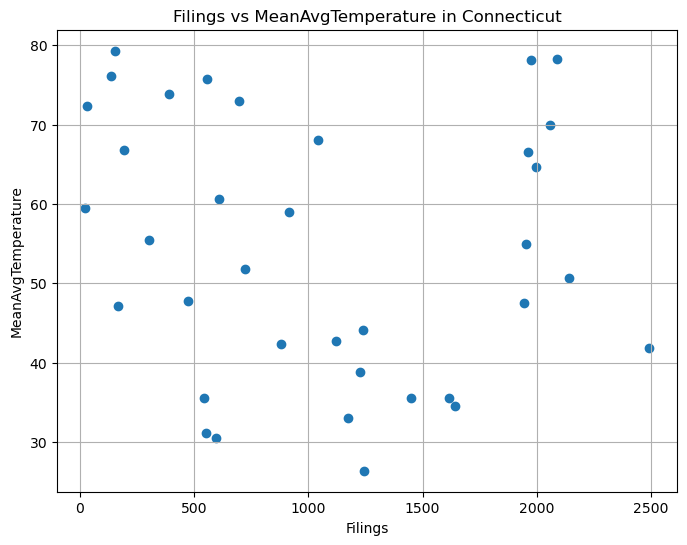

In [108]:
'''This cell aim to create Scatter plot for Connecticut Filings vs MeanAvgTemperature.
From this scatter plot, we want to see if there's any visible correlation between Conviction Filings and Temperature
'''

plt.figure(figsize=(8, 6))
plt.scatter(new_CT_df['filings'], new_CT_df['MeanAvgTemperature'])
plt.xlabel('Filings')
plt.ylabel('MeanAvgTemperature')
plt.title('Filings vs MeanAvgTemperature in Connecticut')
plt.grid(True)
plt.show()

In [109]:
'''This cell aim to perform Chi-square algorithm on dataset of state Connecticut
As we cannot see the trend very clear on the scatter plot, we double check we Chi-square 
to see if a different method would produce the same result.
'''
new_CT_df['MeanTempBins'] = pd.cut(new_CT_df['MeanAvgTemperature'], bins=5) 
contingency_table = pd.crosstab(new_CT_df['filings'], new_CT_df['MeanTempBins'])
chi2, p_val = chisquare(contingency_table)
#print result
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_val}")

Chi-square value: [28. 29. 31. 29. 27.]
P-value: [0.79355434 0.75231487 0.6616805  0.75231487 0.83127249]


In [110]:
#merge conviction and temperature in each state
new_DE_df = pd.merge(delaware_df, DE_df, left_on='month', right_on='Date')
new_DE_df = new_DE_df.drop('month', axis=1)

new_IN_df = pd.merge(indiana_df, IN_df, left_on='month', right_on='Date')
new_IN_df = new_IN_df.drop('month', axis=1)

new_VA_df = pd.merge(virginia_df, VA_df, left_on='month', right_on='Date')
new_VA_df = new_VA_df.drop('month', axis=1)

new_MN_df = pd.merge(minnesota_df, MN_df, left_on='month', right_on='Date')
new_MN_df = new_MN_df.drop('month', axis=1)

new_NM_df = pd.merge(newmexico_df, NM_df, left_on='month', right_on='Date')
new_NM_df = new_NM_df.drop('month', axis=1)

new_MO_df = pd.merge(missouri_df, MO_df, left_on='month', right_on='Date')
new_MO_df = new_MO_df.drop('month', axis=1)

new_WI_df = pd.merge(wisconsin_df, WI_df, left_on='month', right_on='Date')
new_WI_df = new_WI_df.drop('month', axis=1)

new_PA_df = pd.merge(pennsylvania_df, PA_df, left_on='month', right_on='Date')
new_PA_df = new_PA_df.drop('month', axis=1)


In [111]:
'''This cell aims to concatenating all state dataframes into one dataframe, one state after another
This makes performing the scatter plot on all state more simple in terms of going through all states.
Also, by making this new combined dataset, if we later want to perform any other tasks that require combined data of 9 states 
would be more efficient.'''
dfs = [new_MN_df, new_CT_df, new_IN_df, new_VA_df, new_DE_df, new_PA_df, new_MO_df, new_NM_df, new_WI_df]
allstate_df = pd.concat(dfs, ignore_index=True)
allstate_df

,state,filings,Date,MeanAvgTemperature,HighestMaxTemperature,LowestMinTemperature,MeanTempBins
0,minnesota,1491,2020-01,20.4,37,-8,NaN
1,minnesota,169,2021-01,21.7,40,2,NaN
2,minnesota,1003,2022-01,9.4,42,-15,NaN
3,minnesota,1236,2020-02,20.2,43,-10,NaN
4,minnesota,171,2021-02,12.0,47,-18,NaN
...,...,...,...,...,...,...,...
319,wisconsin,1691,2021-11,38.3,73,12,NaN
320,wisconsin,2089,2022-11,40.3,77,8,NaN
321,wisconsin,1504,2020-12,27.2,55,4,NaN
322,wisconsin,1804,2021-12,31.2,69,7,NaN


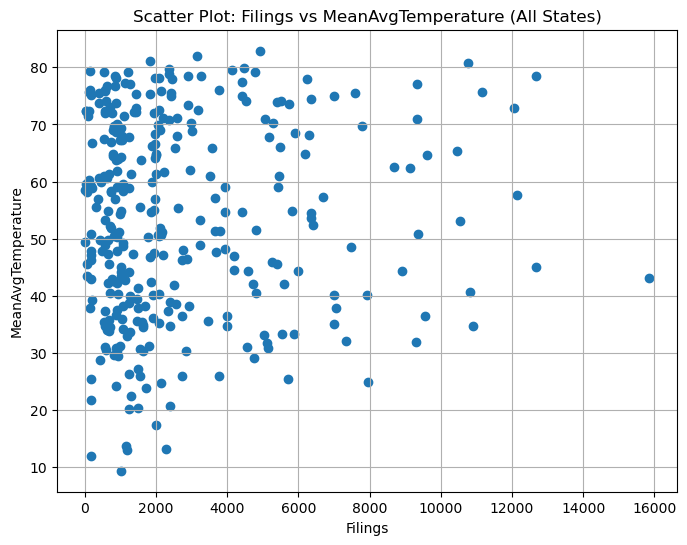

In [112]:
'''Scatter plot for all states in 36 months.
As dataset of one state Connecticut does not show any correlation,
'''

plt.figure(figsize=(8, 6))
plt.scatter(allstate_df['filings'], allstate_df['MeanAvgTemperature'])
plt.xlabel('Filings')
plt.ylabel('MeanAvgTemperature')
plt.title('Scatter Plot: Filings vs MeanAvgTemperature (All States)')
plt.grid(True) #use grid to better allocate the temperature and filings differences
plt.show()


In [113]:
'''This cell aim to perform Chi-square algorithm on dataset of all state in 36 months
As we cannot see the trend very clear on the scatter plot, we double check we Chi-square 
to see if a different method would produce the same result.
'''
allstate_df['MeanTempBins'] = pd.cut(allstate_df['MeanAvgTemperature'], bins=7)  
contingency_table = pd.crosstab(allstate_df['filings'], allstate_df['MeanTempBins'])
chi2, p_val = chisquare(contingency_table)
print(f"P-value: {p_val}")
print(f"Chi-square value: {chi2}")


P-value: [0.56904695 0.80853594 0.98311701 0.99575108 0.98518872 0.99367361
 0.9685701 ]
Chi-square value: [309.         292.         263.16129032 252.         262.
 255.         269.05263158]
